In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

import sys
sys.path.append("../../")
from src.soporte_metricas import (
    obtener_metricas,
    comparar_arboles,
    residual_plot,
    generar_df_comparador
)
pd.options.display.float_format = "{:,.2f}".format
# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../../datos/06_rent_outliers_gestionados.csv")

# Decision Tree
- El árbol de decisiones se usa para modelos no lineales
- Vamos a probarlo a ver si mejora nuestras métricas

In [3]:
X = df.drop(columns="price")
y = df[["price"]]
X_train, X_test, y_train, y_test = train_test_split(X, # Todo menos la Variable Respuesta
                                                    y, # La variable Respuesta
                                                    train_size=0.7, # Como dividir los datos en este caso 80% train, 20% test
                                                    random_state=42, # Semilla, para que lo haga igual para cualquier persona
                                                    shuffle=True 
                                                    )

### Decision tree sin ajustar

In [4]:
modelo_arbol = DecisionTreeRegressor()
modelo_arbol.fit(X_train,y_train)
y_pred_test = modelo_arbol.predict(X_test)
y_pred_train = modelo_arbol.predict(X_train)
df_metricas = obtener_metricas(y_train,y_pred_train,y_test,y_pred_test)
df_metricas

,r2_score,MAE,MSE,RMSE
train,0.96,3.34,229.65,15.15
test,0.23,55.68,"6,568.76",81.05


In [5]:
importancia = pd.DataFrame(modelo_arbol.feature_importances_,columns=["Importancia"], index= X.columns).sort_values(by="Importancia",ascending=False)
importancia

,Importancia
municipality,0.55
size,0.11
rooms_1 habitacion,0.06
floor_primero,0.04
district,0.04
floor_quinto,0.03
distancia_centro,0.02
floor_tercero,0.02
hasLift_no tiene ascensor,0.01
rooms_3 habitaciones,0.01


<Axes: ylabel='None'>

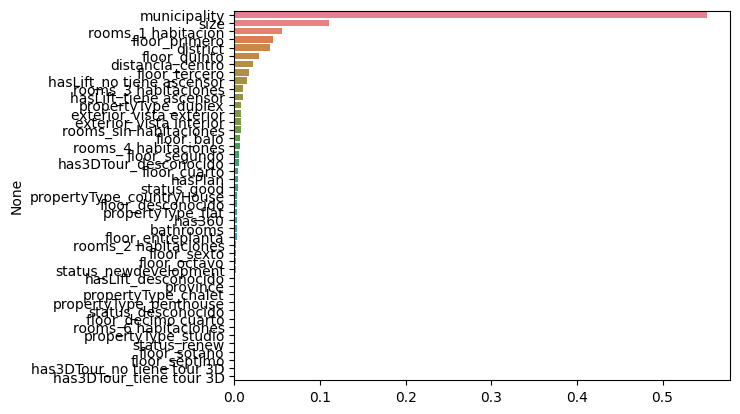

In [6]:
sns.barplot(y=importancia.index,x=importancia["Importancia"].values,hue=importancia.index)

# No continuamos
- Este modelo tiene demasiado overfitting
### ¿Qué significa?
- Tenemos pocos datos
- Tenemos columnas que especifican demasiado